In [2]:
from chess_env import ChessEnv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import random


def build_model(input_shape, num_actions):
    model = keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_actions, activation='linear')
    ])
    return model


2024-02-07 11:06:45.016546: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-07 11:06:45.488129: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-07 11:06:45.488199: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-07 11:06:45.582112: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-07 11:06:45.767885: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-07 11:06:45.770286: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [ ]:
input_shape = (8, 8, 6)  # Adjust based on your observation space
num_actions =  len(list(chess.Board().legal_moves))  # Adjust based on your action space
model = build_model(input_shape, num_actions)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')


In [3]:
chess_env = ChessEnv()
print(chess_env.board)
print(len(list(chess_env.board.legal_moves)))


r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
20


In [4]:
env = ChessEnv()
num_episodes = 50
input_shape = (8, 8, 6)  # Adjust based on your observation space
num_actions =  len(list(chess_env.board.legal_moves))  # Adjust based on your action space
model = build_model(input_shape, num_actions)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')


for episode in range(num_episodes):
    state = env.reset()
    state = np.expand_dims(state, axis=0)

    total_reward = 0
    done = False
    while not done:
        # Select action using epsilon-greedy policy or any exploration strategy
        action = np.random.choice(num_actions)
        next_state, reward, done, info = env.step(action)
        next_state = np.expand_dims(next_state, axis=0)

        target = reward + 0.99 * np.max(model.predict(next_state))
        with tf.GradientTape() as tape:
            q_values = model(state, training=True)
            action_mask = tf.one_hot(action, num_actions)
            q_values = tf.reduce_sum(tf.multiply(q_values, action_mask), axis=1)
            loss = keras.losses.mean_squared_error(target, q_values)

        gradients = tape.gradient(loss, model.trainable_variables)
        model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        total_reward += reward
        state = next_state

    print(f'Episode: {episode}, total_reward: {total_reward}')


1/1 [==============================] - 0s 17ms/step
Episode: 0, total_reward: -655
1/1 [==============================] - 0s 18ms/step
Episode: 1, total_reward: 1407
1/1 [==============================] - 0s 18ms/step
Episode: 2, total_reward: -2195
1/1 [==============================] - 0s 24ms/step
Episode: 3, total_reward: -228
1/1 [==============================] - 0s 16ms/step
Episode: 4, total_reward: -334
1/1 [==============================] - 0s 15ms/step
Episode: 5, total_reward: -253
1/1 [==============================] - 0s 16ms/step
Episode: 6, total_reward: -217
1/1 [==============================] - 0s 16ms/step
Episode: 7, total_reward: -196
1/1 [==============================] - 0s 15ms/step
Episode: 8, total_reward: -551
1/1 [==============================] - 0s 19ms/step
Episode: 9, total_reward: -374
1/1 [==============================] - 0s 19ms/step
Episode: 10, total_reward: -3758
1/1 [==============================] - 0s 15ms/step
Episode: 11, total_reward: 3078


In [8]:
model.save('dqn_chess.h5')
model.save_weights('dqn_chess_weights.h5')


/home/jk/CityUSeattle/artificial_intel_for_data_sciecnce_DS510/team-project/chess_prediction_ml_ds510/venv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
env.choose_move(0)



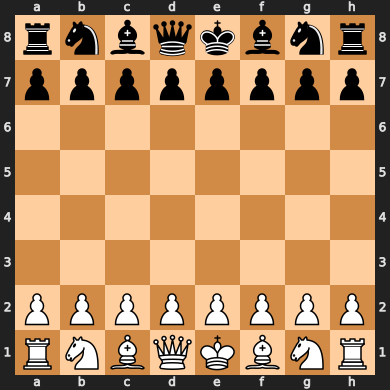

AttributeError: 'ChessEnv' object has no attribute 'choose_move'

In [30]:
import chess
import chess.svg
from IPython.display import SVG, display

def choose_move(model, state):
        q_values= model.predict(state, axis=0)
        move = np.argmax(q_values)
        return move

game = ChessEnv()
state = game.reset()
model = keras.models.load_model('dqn_chess.h5')

display(SVG(chess.svg.board(board=game.board)))
while not game._is_game_over():
    action = game.choose_move(state=state)
    game.step(action)
    next_state, reward, done, info = game.step(action)
    display(SVG(chess.svg.board(board=game.board)))
    print("Chosen move:", list(env.board.legal_moves)[action])
    state = next_state
display(SVG(chess.svg.board(board=game.board)))
print("Game over")